In [183]:
from openpiv import tools, process, scaling, validation, filters, preprocess
import numpy as np
import os
from time import time
import warnings


import matplotlib.pyplot as plt
%matplotlib inline  

In [192]:
# we can run it from any folder
#path = settings.filepath_images


#frame_a  = tools.imread( os.path.join(path,settings.frame_pattern_a))
#frame_b  = tools.imread( os.path.join(path,settings.frame_pattern_b))
file1_name = '/Users/Jasper/Volc_Research/OpenPIV/F10_Clip/DJI_0003_20180726_1440-Vpt6postTypeA-Copy1.MOV_117.jpg'

frame_a = tools.imread(file1_name)

frame_b  = tools.imread('/Users/Jasper/Volc_Research/OpenPIV/F10_Clip/DJI_0003_20180726_1440-Vpt6postTypeA-Copy1.MOV_118.jpg')



frame_a = (frame_a).astype(np.int32)
frame_b = (frame_b).astype(np.int32)

u, v, sig2noise = process.extended_search_area_piv( frame_a, frame_b, \
    window_size=64, overlap=32, dt=1, search_area_size=128, sig2noise_method='peak2peak' )
x, y = process.get_coordinates( image_size=frame_a.shape, window_size=64, overlap=32 )
u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 1.2 )
u, v, mask = validation.global_val( u, v, (-1000, 2000), (-1000, 1000) )
u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2)
x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 1)
#MY EDIT, Adding Time as A column
sec = file1_name[len(file1_name)-7: len(file1_name)-4]

time = [[sec for i in range(v.shape[1])] for j in range(v.shape[0])]
time = np.array(time)
time


tools.save(x, y, u, v, mask, '/Users/Jasper/Volc_Research/OpenPIV/UV_Fields_Test/DJI_0003_20180726_1440-Vpt6postTypeA-Copy1.MOV_17-18.csv')

In [166]:
#MY EDIT, Adding Time as A column
#sec = file1_name[len(file1_name)-7: len(file1_name)-4]

#time = [[sec for i in range(v.shape[1])] for j in range(v.shape[0])]
#time = np.array(time)
#time


#tools.save(x, y, u, v, time, '/Users/Jasper/Volc_Research/OpenPIV/UV_Fields_Test/DJI_0003_20180726_1440-Vpt6postTypeA-Copy1.MOV_17-18.csv', fmt= '%s' )

<function openpiv.tools.save(x, y, u, v, mask, filename, fmt='%8.4f', delimiter='\t')>

In [181]:
#Proper way to add time
sec = file1_name[len(file1_name)-7: len(file1_name)-4]

time = [[sec for i in range(v.shape[1])] for j in range(v.shape[0])]
time = np.array(time)
time

array([['117', '117', '117', ..., '117', '117', '117'],
       ['117', '117', '117', ..., '117', '117', '117'],
       ['117', '117', '117', ..., '117', '117', '117'],
       ...,
       ['117', '117', '117', ..., '117', '117', '117'],
       ['117', '117', '117', ..., '117', '117', '117'],
       ['117', '117', '117', ..., '117', '117', '117']], dtype='<U3')

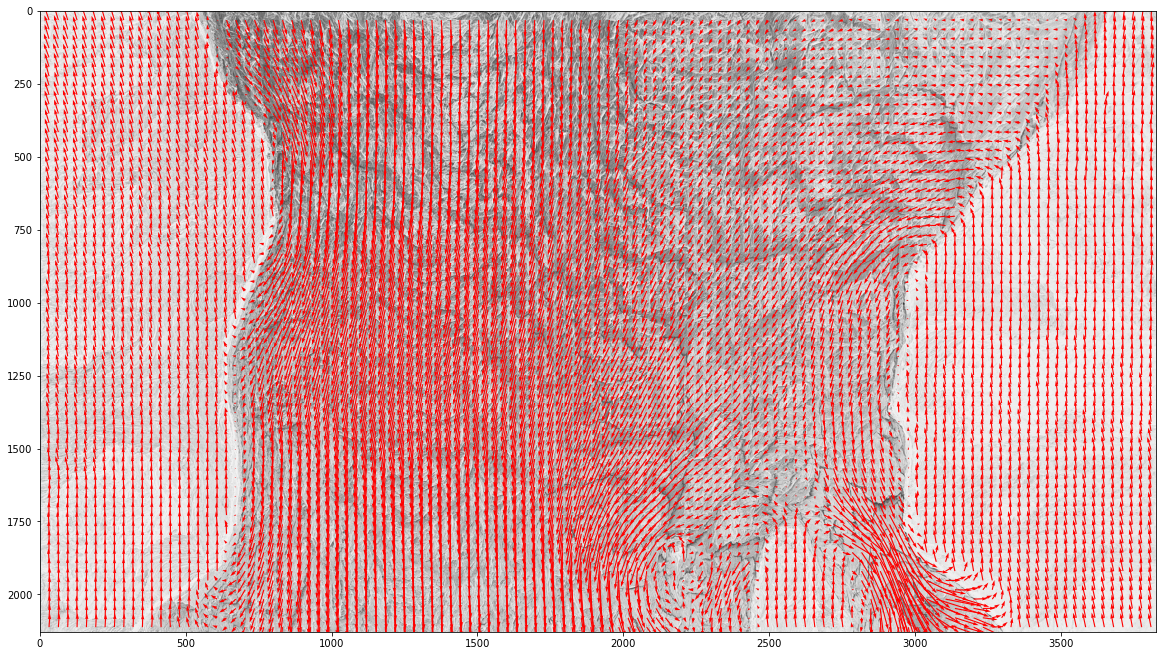

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa097261820>)

In [188]:
fig,ax = plt.subplots(figsize=(20,20))
tools.display_vector_field('/Users/Jasper/Volc_Research/OpenPIV/UV_Fields_Test/DJI_0003_20180726_1440-Vpt6postTypeA-Copy1.MOV_17-18.csv', scale=400, width=0.001,ax=ax,on_img=True,image_name='/Users/Jasper/Volc_Research/OpenPIV/F10_Clip/DJI_0003_20180726_1440-Vpt6postTypeA-Copy1.MOV_117.jpg')

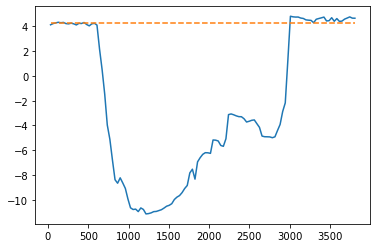

In [189]:
# plot the profile of vertical velocity
plt.plot(x[0,:],v[35,:].T)
plt.plot(x[0,:],np.ones_like(x[0,:])*4.3,'--')
plt.show()

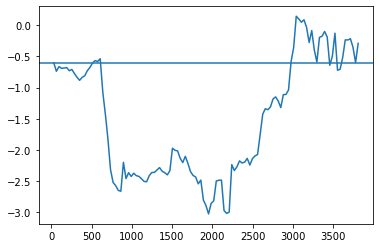

In [190]:
# plot the profile of horizontal velocity
plt.plot(x[0,:],u[35,:].T)
plt.axhline(y=-0.6)

plt.show()

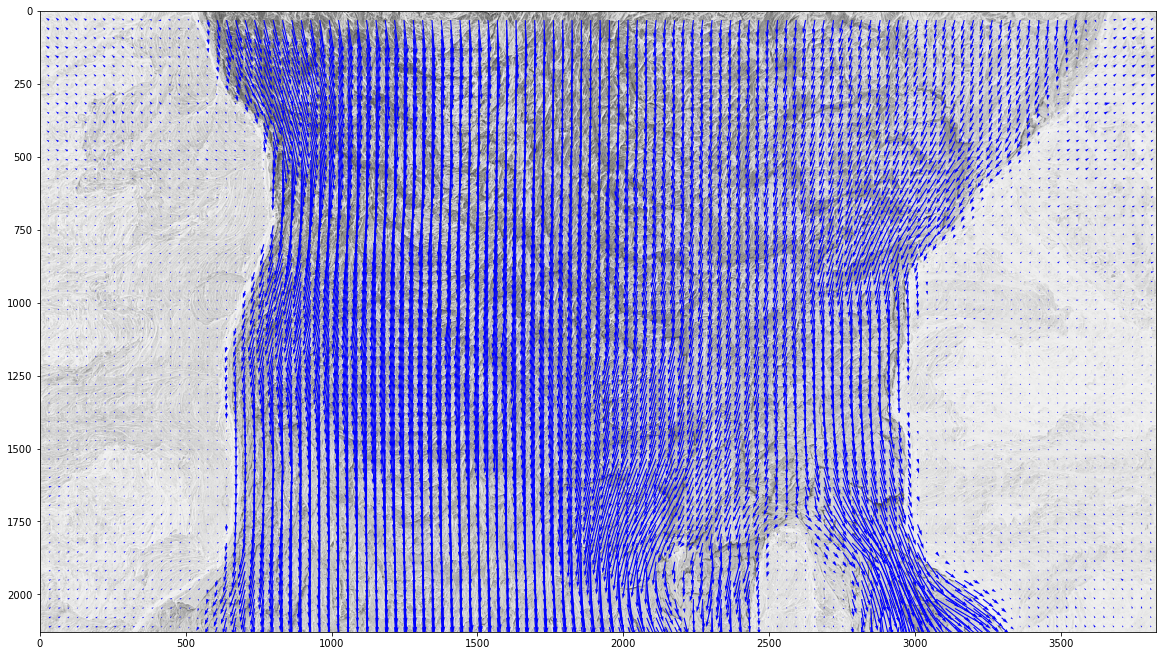

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa096cf6940>)

In [191]:
tools.save(x, y, u+0.6, v-4.3, mask, '/Users/Jasper/Volc_Research/OpenPIV/UV_Fields_Test/DJI_0003_20180726_1440-Vpt6postTypeA-Copy1.MOV_17-18.csv' )
fig,ax = plt.subplots(figsize=(20,20))
tools.display_vector_field('/Users/Jasper/Volc_Research/OpenPIV/UV_Fields_Test/DJI_0003_20180726_1440-Vpt6postTypeA-Copy1.MOV_17-18.csv', scale=400, width=0.001,ax=ax,on_img=True,
                           image_name='/Users/Jasper/Volc_Research/OpenPIV/F10_Clip/DJI_0003_20180726_1440-Vpt6postTypeA-Copy1.MOV_117.jpg')